In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
# importing the packages I think I'll need

In [2]:
CR7 = pd.read_csv("CR7data.csv")
# importing Cristiano Ronaldo club goals data from .csv files from Kaggle.

In [3]:
CR7.head()
# show first few rows of the dataset

,Unnamed: 0,Goal_no,Season,Competition,Matchday,Venue,Team,Opponent,Result,Position,Minute,At_score,Type_of_goal
0,0,1,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,LW,34,2:0,Solo run
1,1,2,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,NaN,90+5,3:0,Header
2,2,3,2/3,Liga Portugal,8,A,Sporting CP,Boavista FC,1:2,NaN,88,1:2,Right-footed shot
3,3,4,2/3,TaÃ§a de Portugal Placard,Fourth Round,H,Sporting CP,CD Estarreja,4:1,NaN,67,3:0,Left-footed shot
4,4,5,2/3,TaÃ§a de Portugal Placard,Fifth Round,H,Sporting CP,FC Oliveira do Hospital,8:1,NaN,13,3:0,NaN


In [4]:
CR7.info()
# return the information types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    698 non-null    int64 
 1   Goal_no       698 non-null    int64 
 2   Season        698 non-null    object
 3   Competition   698 non-null    object
 4   Matchday      698 non-null    object
 5   Venue         698 non-null    object
 6   Team          698 non-null    object
 7   Opponent      698 non-null    object
 8   Result        698 non-null    object
 9   Position      640 non-null    object
 10  Minute        698 non-null    object
 11  At_score      698 non-null    object
 12  Type_of_goal  683 non-null    object
dtypes: int64(2), object(11)
memory usage: 71.0+ KB


In [5]:
# so it's a dataframe with 698 rows & 13 columns
# two columns have missing values, so hopefully only minor cleaning required
# find the null values & sum them
missing_values_count = CR7.isnull().sum()
print(missing_values_count)

Unnamed: 0       0
Goal_no          0
Season           0
Competition      0
Matchday         0
Venue            0
Team             0
Opponent         0
Result           0
Position        58
Minute           0
At_score         0
Type_of_goal    15
dtype: int64


In [6]:
def size_NA(df, name):                 # Here we take in the dataframe & column name, represented by "df" & "name"
    missing_values = df[name].isnull().sum()  # assign the number of null cells in the column to missing_values
    total_rows = df.shape[0]                 # assign the number of rows in the dataframe to total_rows
    percentNA = (missing_values / total_rows) * 100 # assign the % of rows in the df that contain null values to percentNA
    return percentNA       # And now we return this function as the variable "percentNA"

In [7]:
size_NA(CR7,'Position')
# call the defined function, passing in the dataframe & the attribute with the highest number of NA values

8.30945558739255

In [8]:
# based on this I would loos roughly 8% of my data by doing a drop NA.
droprows= CR7.dropna() # set the data with NAs dropped (rows) as droprows
print(CR7.shape,droprows.shape) # print the shape of original data, prin the shape of the data with NA rows dropped

(698, 13) (634, 13)


In [9]:
drop_duplicates= CR7.drop_duplicates() # perform drop duplicates on CR7 & dave in drop duplicates
print(CR7.shape,drop_duplicates.shape) # print the shape of CR7 & drop duplicates

(698, 13) (698, 13)


In [10]:
# so no duplicates in our dataframe
# missing 64 goals if I drop the NAs
# think I'll fill them instead
# I set my fillna function to fill NAs in the column 'Position' with "Forward" & 'Type_of_goal' with Body
# print the data frame
# now I have no duplicates & no NAs in my data
CR7.fillna({'Position':'Forward', 'Type_of_goal':'Body'}, inplace=True)
CR7

,Unnamed: 0,Goal_no,Season,Competition,Matchday,Venue,Team,Opponent,Result,Position,Minute,At_score,Type_of_goal
0,0,1,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,LW,34,2:0,Solo run
1,1,2,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,Forward,90+5,3:0,Header
2,2,3,2/3,Liga Portugal,8,A,Sporting CP,Boavista FC,1:2,Forward,88,1:2,Right-footed shot
3,3,4,2/3,TaÃ§a de Portugal Placard,Fourth Round,H,Sporting CP,CD Estarreja,4:1,Forward,67,3:0,Left-footed shot
4,4,5,2/3,TaÃ§a de Portugal Placard,Fifth Round,H,Sporting CP,FC Oliveira do Hospital,8:1,Forward,13,3:0,Body
...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,693,694,21/22,Premier League,33,H,Manchester United,Norwich City,3:2,CF,32,2:0,Header
694,694,695,21/22,Premier League,33,H,Manchester United,Norwich City,3:2,CF,76,3:2,Direct free kick
695,695,696,21/22,Premier League,34,A,Manchester United,Arsenal FC,3:1,CF,34,2:1,Left-footed shot
696,696,697,21/22,Premier League,37,H,Manchester United,Chelsea FC,1:1,CF,62,1:1,Right-footed shot


In [11]:
CR7['# of Goals']=1
# add a column of 1s into the DF so I can perform sum, mean,etc. calculations on the data
CR7

,Unnamed: 0,Goal_no,Season,Competition,Matchday,Venue,Team,Opponent,Result,Position,Minute,At_score,Type_of_goal,# of Goals
0,0,1,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,LW,34,2:0,Solo run,1
1,1,2,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,Forward,90+5,3:0,Header,1
2,2,3,2/3,Liga Portugal,8,A,Sporting CP,Boavista FC,1:2,Forward,88,1:2,Right-footed shot,1
3,3,4,2/3,TaÃ§a de Portugal Placard,Fourth Round,H,Sporting CP,CD Estarreja,4:1,Forward,67,3:0,Left-footed shot,1
4,4,5,2/3,TaÃ§a de Portugal Placard,Fifth Round,H,Sporting CP,FC Oliveira do Hospital,8:1,Forward,13,3:0,Body,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,693,694,21/22,Premier League,33,H,Manchester United,Norwich City,3:2,CF,32,2:0,Header,1
694,694,695,21/22,Premier League,33,H,Manchester United,Norwich City,3:2,CF,76,3:2,Direct free kick,1
695,695,696,21/22,Premier League,34,A,Manchester United,Arsenal FC,3:1,CF,34,2:1,Left-footed shot,1
696,696,697,21/22,Premier League,37,H,Manchester United,Chelsea FC,1:1,CF,62,1:1,Right-footed shot,1


In [12]:
CR7.drop('Unnamed: 0', axis=1, inplace=True) # remove the Unnamed column
CR7

,Goal_no,Season,Competition,Matchday,Venue,Team,Opponent,Result,Position,Minute,At_score,Type_of_goal,# of Goals
0,1,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,LW,34,2:0,Solo run,1
1,2,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,Forward,90+5,3:0,Header,1
2,3,2/3,Liga Portugal,8,A,Sporting CP,Boavista FC,1:2,Forward,88,1:2,Right-footed shot,1
3,4,2/3,TaÃ§a de Portugal Placard,Fourth Round,H,Sporting CP,CD Estarreja,4:1,Forward,67,3:0,Left-footed shot,1
4,5,2/3,TaÃ§a de Portugal Placard,Fifth Round,H,Sporting CP,FC Oliveira do Hospital,8:1,Forward,13,3:0,Body,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,694,21/22,Premier League,33,H,Manchester United,Norwich City,3:2,CF,32,2:0,Header,1
694,695,21/22,Premier League,33,H,Manchester United,Norwich City,3:2,CF,76,3:2,Direct free kick,1
695,696,21/22,Premier League,34,A,Manchester United,Arsenal FC,3:1,CF,34,2:1,Left-footed shot,1
696,697,21/22,Premier League,37,H,Manchester United,Chelsea FC,1:1,CF,62,1:1,Right-footed shot,1


In [13]:
CR7_reverse = CR7.sort_values('Goal_no', ascending = False) # sort data in reverse, ie. newest goal to oldest goal
CR7_reverse

,Goal_no,Season,Competition,Matchday,Venue,Team,Opponent,Result,Position,Minute,At_score,Type_of_goal,# of Goals
697,698,21/22,Premier League,35,H,Manchester United,Brentford FC,3:0,CF,61,2:0,Penalty,1
696,697,21/22,Premier League,37,H,Manchester United,Chelsea FC,1:1,CF,62,1:1,Right-footed shot,1
695,696,21/22,Premier League,34,A,Manchester United,Arsenal FC,3:1,CF,34,2:1,Left-footed shot,1
694,695,21/22,Premier League,33,H,Manchester United,Norwich City,3:2,CF,76,3:2,Direct free kick,1
693,694,21/22,Premier League,33,H,Manchester United,Norwich City,3:2,CF,32,2:0,Header,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,2/3,TaÃ§a de Portugal Placard,Fifth Round,H,Sporting CP,FC Oliveira do Hospital,8:1,Forward,13,3:0,Body,1
3,4,2/3,TaÃ§a de Portugal Placard,Fourth Round,H,Sporting CP,CD Estarreja,4:1,Forward,67,3:0,Left-footed shot,1
2,3,2/3,Liga Portugal,8,A,Sporting CP,Boavista FC,1:2,Forward,88,1:2,Right-footed shot,1
1,2,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,Forward,90+5,3:0,Header,1


In [14]:
CR7.groupby('Position')['# of Goals'].apply(np.sum)

Position
CF         198
CF           3
Forward     58
LW         355
LW           5
RW          79
Name: # of Goals, dtype: int64

In [15]:
Position = {}
Position['Position'] = [d for d in CR7.Position]
print(Position)
# used a for loop to save Position column as a dictionary & print the dictionary
# trying to find the anomalies in the position - ie. why I have 2 CFs and 2 LWs in the groupby.

{'Position': ['LW', 'Forward', 'Forward', 'Forward', 'Forward', 'RW', 'RW', 'Forward', 'Forward', 'Forward', 'RW', 'Forward', 'Forward', 'Forward', 'RW', 'RW', 'Forward', 'Forward', 'Forward', 'RW', 'Forward', 'Forward', 'RW', 'Forward', 'Forward', 'Forward', 'Forward', 'RW', 'RW', 'RW', 'Forward', 'RW', 'Forward', 'CF', 'Forward', 'RW', 'Forward', 'Forward', 'Forward', 'Forward', 'Forward', 'Forward', 'RW', 'RW', 'Forward', 'RW', 'RW', 'Forward', 'RW', 'Forward', 'RW', 'RW', 'Forward', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'Forward', 'Forward', 'Forward', 'RW', 'RW', 'Forward', 'RW', 'Forward', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'Forward', 'Forward', 'Forward', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'LW', 'Forward', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'LW', 'Forward', 'LW', 'LW', 'LW', 'CF', 'Forward', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'CF', 'CF', 'RW', 'RW', 'Forward', 'CF', 'CF', 'RW'

In [16]:
CR7['Position'] = CR7['Position'].str.replace('CF ','CF')
CR7['Position'] = CR7['Position'].str.replace('LW ','LW')
# overwirte instances of CF, trying to stop the duplication in position when we grouby position

In [17]:
CR7.groupby('Position')['# of Goals'].apply(np.sum)
# print groupby again to see did it work

Position
CF         201
Forward     58
LW         360
RW          79
Name: # of Goals, dtype: int64

In [18]:
PositionGoals = pd.DataFrame(CR7.groupby('Position')['# of Goals'].apply(np.sum).reset_index())
PositionGoals
# Create a subset dataset of the CR7 goal data (Position) & print it

,Position,# of Goals
0,CF,201
1,Forward,58
2,LW,360
3,RW,79


In [19]:
CR7

,Goal_no,Season,Competition,Matchday,Venue,Team,Opponent,Result,Position,Minute,At_score,Type_of_goal,# of Goals
0,1,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,LW,34,2:0,Solo run,1
1,2,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,Forward,90+5,3:0,Header,1
2,3,2/3,Liga Portugal,8,A,Sporting CP,Boavista FC,1:2,Forward,88,1:2,Right-footed shot,1
3,4,2/3,TaÃ§a de Portugal Placard,Fourth Round,H,Sporting CP,CD Estarreja,4:1,Forward,67,3:0,Left-footed shot,1
4,5,2/3,TaÃ§a de Portugal Placard,Fifth Round,H,Sporting CP,FC Oliveira do Hospital,8:1,Forward,13,3:0,Body,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,694,21/22,Premier League,33,H,Manchester United,Norwich City,3:2,CF,32,2:0,Header,1
694,695,21/22,Premier League,33,H,Manchester United,Norwich City,3:2,CF,76,3:2,Direct free kick,1
695,696,21/22,Premier League,34,A,Manchester United,Arsenal FC,3:1,CF,34,2:1,Left-footed shot,1
696,697,21/22,Premier League,37,H,Manchester United,Chelsea FC,1:1,CF,62,1:1,Right-footed shot,1


In [20]:
x = CR7.index[0]
if x in CR7.index:
    print("CR7's first goal was a "+str(CR7.iloc[x, 11]+str(" against ")+str(CR7.iloc[x,6])))  

CR7's first goal was a Solo run against Moreirense FC


In [21]:
x = CR7.index[-1]
if x in CR7.index:
    print("CR7's last goal was a "+str(CR7.iloc[x, 11]+str(" against ")+str(CR7.iloc[x,6])))  

CR7's last goal was a Penalty against Brentford FC


In [22]:
# prints out the type & opposition of the first & last goal scored by CR7

In [23]:
PositionMinGoals = pd.DataFrame(CR7.groupby(['Position','Minute'])['# of Goals'].apply(np.sum).reset_index())
PositionMinGoals

,Position,Minute,# of Goals
0,CF,10,4
1,CF,11,2
2,CF,12,2
3,CF,13,6
4,CF,14,1
...,...,...,...
267,RW,87,1
268,RW,88,4
269,RW,9,1
270,RW,90+2,1


In [24]:
PositionTypeGoals = pd.DataFrame(CR7.groupby(['Position','Type_of_goal'])['# of Goals'].apply(np.sum).reset_index())
PositionTypeGoals

,Position,Type_of_goal,# of Goals
0,CF,Body,1
1,CF,Counter attack goal,2
2,CF,Deflected shot on goal,1
3,CF,Direct free kick,10
4,CF,Header,36
5,CF,Left-footed shot,27
6,CF,Long distance kick,1
7,CF,Penalty,34
8,CF,Penalty rebound,2
9,CF,Right-footed shot,81


In [25]:
CompGoals = pd.DataFrame(CR7.groupby('Competition')['# of Goals'].apply(np.sum).reset_index())
CompGoals

,Competition,# of Goals
0,Copa del Rey,22
1,EFL Cup,4
2,FA Cup,13
3,FIFA Club World Cup,7
4,Italy Cup,4
5,LaLiga,311
6,Liga Portugal,3
7,Premier League,102
8,Serie A,81
9,Supercopa,4


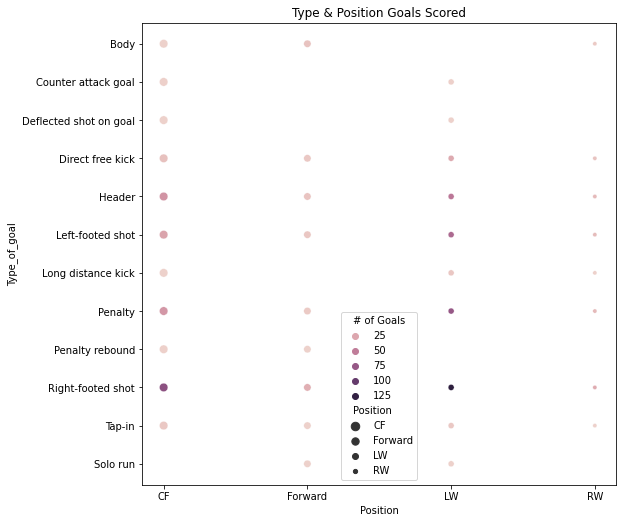

In [26]:
sns.scatterplot(x='Position',y='Type_of_goal', data=PositionTypeGoals, hue='# of Goals',size='Position')
plt.title('Type & Position Goals Scored').figure.set_size_inches(8.5, 8.5)

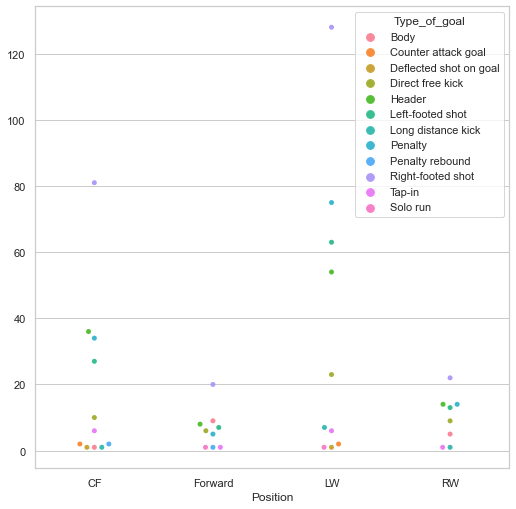

In [27]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.swarmplot(data=PositionTypeGoals, x="Position", y="# of Goals", hue="Type_of_goal")
ax.set(ylabel="")
ax.figure.set_size_inches(8.5, 8.5)

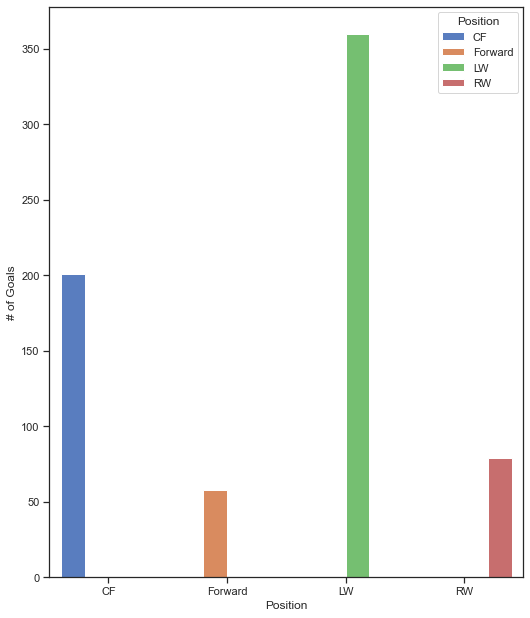

In [28]:
sns.set_theme(style="ticks",palette="muted")
ax = sns.barplot(data=PositionGoals, y='# of Goals', x='Position', hue='Position')
ax.set(ylabel="# of Goals")
ax.figure.set_size_inches(8.5, 10.5)

In [29]:
TypeGoals = pd.DataFrame(CR7.groupby('Type_of_goal')['# of Goals'].apply(np.sum).reset_index())
TypeGoals

,Type_of_goal,# of Goals
0,Body,15
1,Counter attack goal,4
2,Deflected shot on goal,2
3,Direct free kick,48
4,Header,112
5,Left-footed shot,110
6,Long distance kick,9
7,Penalty,128
8,Penalty rebound,3
9,Right-footed shot,251


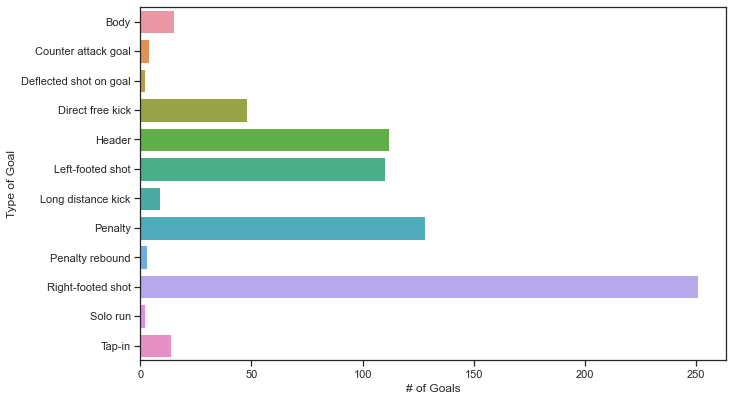

In [30]:
sns.set_theme(style="ticks",palette="muted")
ax = sns.barplot(data=TypeGoals, y='Type_of_goal', x='# of Goals')
ax.set(ylabel="Type of Goal")
ax.figure.set_size_inches(10.5, 6.5)

In [31]:
TypeGoals

,Type_of_goal,# of Goals
0,Body,15
1,Counter attack goal,4
2,Deflected shot on goal,2
3,Direct free kick,48
4,Header,112
5,Left-footed shot,110
6,Long distance kick,9
7,Penalty,128
8,Penalty rebound,3
9,Right-footed shot,251


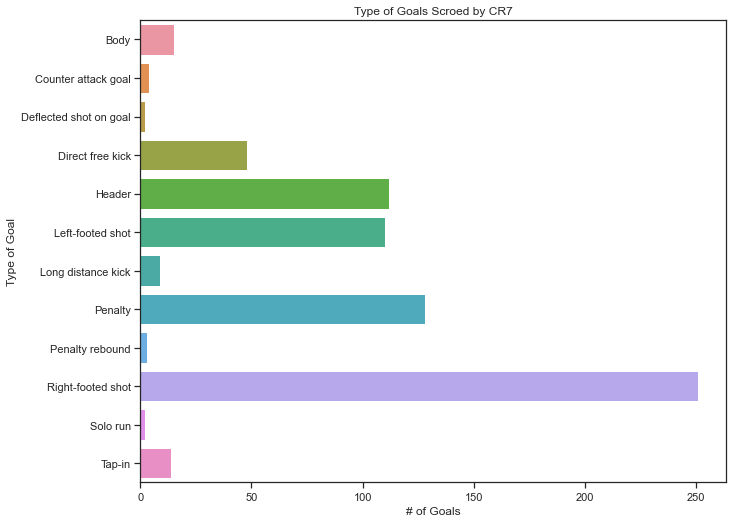

In [32]:
sns.set_theme(style="ticks",palette="muted")
ax = sns.barplot(data=TypeGoals, y='Type_of_goal', x='# of Goals')
ax.set(ylabel="Type of Goal")
ax.set(xlabel="# of Goals")
ax.set(title="Type of Goals Scroed by CR7")
ax.figure.set_size_inches(10.5, 8.5)

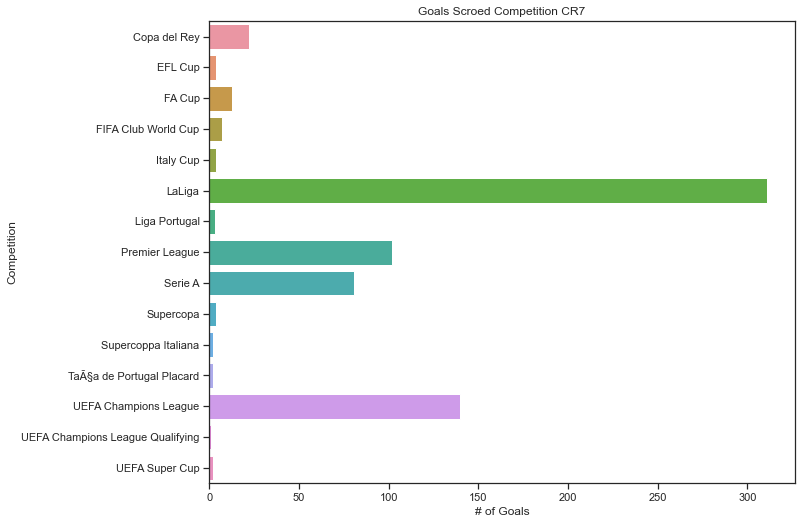

In [33]:
sns.set_theme(style="ticks",palette="muted")
ax = sns.barplot(data=CompGoals, y='Competition', x='# of Goals')
ax.set(ylabel="Competition")
ax.set(xlabel="# of Goals")
ax.set(title="Goals Scroed Competition CR7")
ax.figure.set_size_inches(10.5, 8.5)

In [49]:
MinuteGoals = pd.DataFrame(CR7.groupby('Minute')['# of Goals'].apply(np.sum).reset_index())
MinuteGoals

,Minute,# of Goals
0,1,1
1,10,10
2,11,6
3,12,9
4,120,1
...,...,...
97,90+4,2
98,90+5,2
99,90+6,2
100,90+7,1


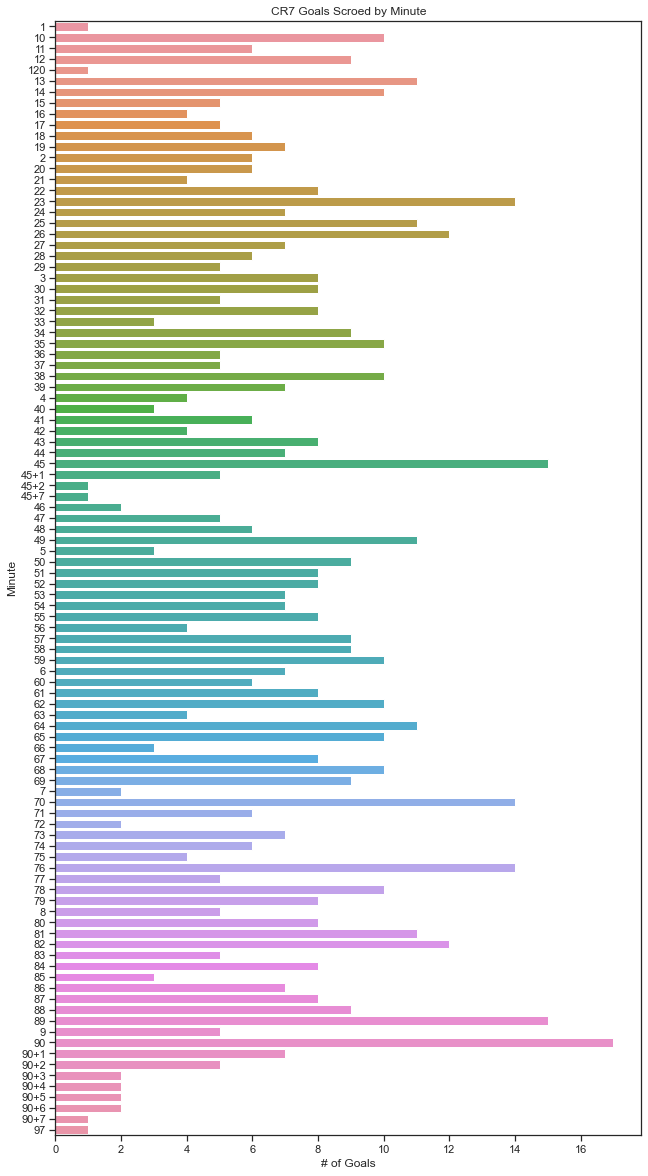

In [51]:
sns.set_theme(style="ticks",palette="muted")
ax = sns.barplot(data=MinuteGoals, y='Minute', x='# of Goals')
ax.set(ylabel="Minute")
ax.set(xlabel="# of Goals")
ax.set(title="CR7 Goals Scroed by Minute")
ax.figure.set_size_inches(10.5, 20.5)

In [52]:
print(MinuteGoals)

    Minute  # of Goals
0        1           1
1       10          10
2       11           6
3       12           9
4      120           1
..     ...         ...
97    90+4           2
98    90+5           2
99    90+6           2
100   90+7           1
101     97           1

[102 rows x 2 columns]


In [55]:
display(MinuteGoals)

,Minute,# of Goals
0,1,1
1,10,10
2,11,6
3,12,9
4,120,1
...,...,...
97,90+4,2
98,90+5,2
99,90+6,2
100,90+7,1
